In [84]:
import os
os.environ['OMP_NUM_THREADS'] = '1'

from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore", message="KMeans is known to have a memory leak on Windows with MKL")

In [40]:
file_path = 'Mall_Customers.csv'
data = pd.read_csv(file_path)

In [42]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [62]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [70]:
data.shape

(200, 5)

In [72]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [74]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [44]:
X = data[['Annual Income (k$)', 'Spending Score (1-100)']]

In [46]:
X

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [86]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

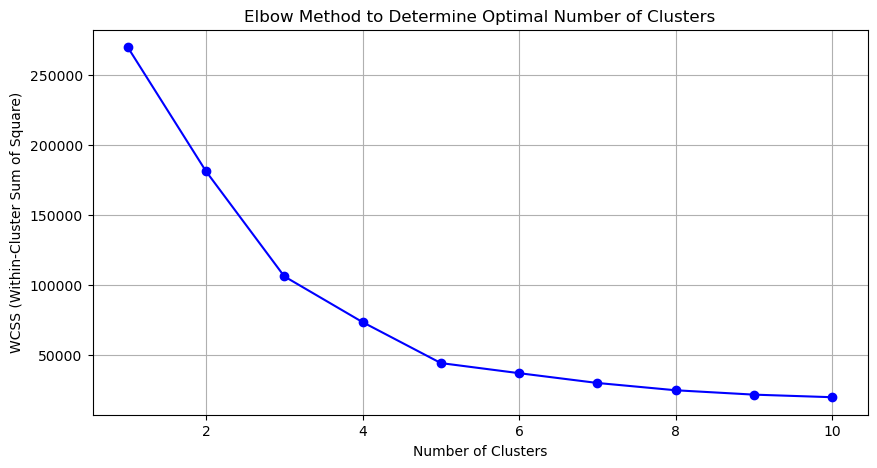

In [88]:
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='-', color='b')
plt.title('Elbow Method to Determine Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Square)')
plt.grid(True)
plt.show()


In [90]:
# Apply K-means clustering with 5 clusters
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=42)
y_kmeans = kmeans.fit_predict(X)

In [92]:
kmeans

KMeans(n_clusters=5, n_init=10, random_state=42)

In [94]:
y_kmeans 

array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 0,
       4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 1, 0, 1, 3, 1, 3, 1,
       0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1])

In [96]:
data['Cluster'] = y_kmeans

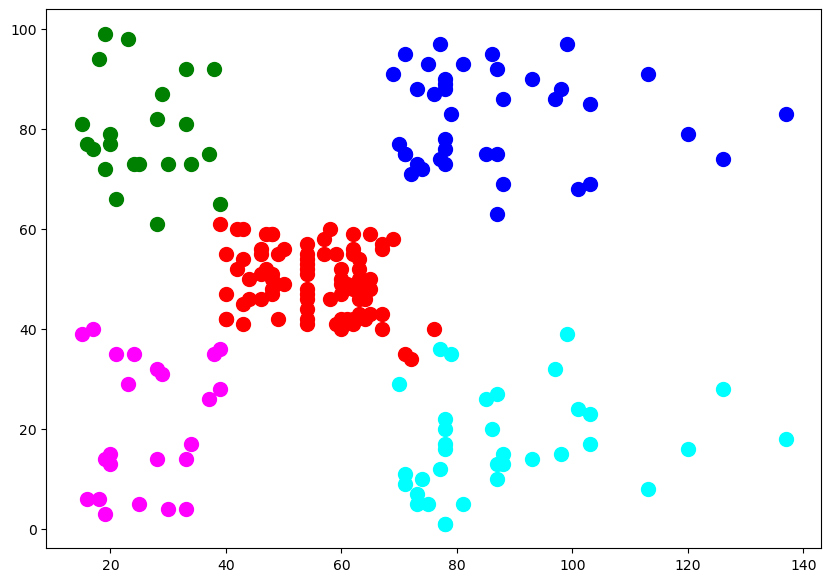

In [98]:
plt.figure(figsize=(10, 7))
plt.scatter(X.values[y_kmeans == 0, 0], X.values[y_kmeans == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(X.values[y_kmeans == 1, 0], X.values[y_kmeans == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(X.values[y_kmeans == 2, 0], X.values[y_kmeans == 2, 1], s=100, c='green', label='Cluster 3')
plt.scatter(X.values[y_kmeans == 3, 0], X.values[y_kmeans == 3, 1], s=100, c='cyan', label='Cluster 4')
plt.scatter(X.values[y_kmeans == 4, 0], X.values[y_kmeans == 4, 1], s=100, c='magenta', label='Cluster 5')

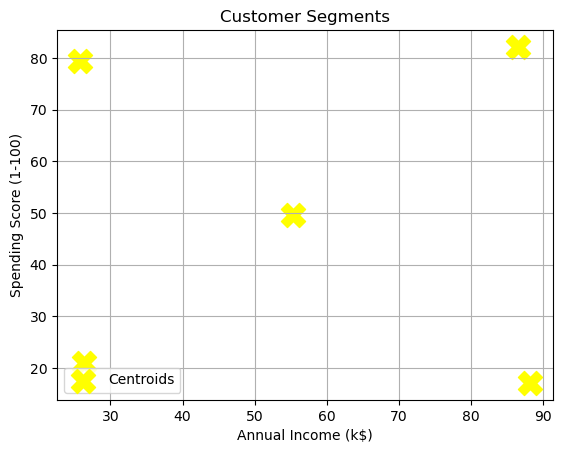

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,2
2,3,Female,20,16,6,4
3,4,Female,23,16,77,2
4,5,Female,31,17,40,4


In [100]:

# Plotting the centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids', marker='X')

plt.title('Customer Segments')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.grid(True)
plt.show()

# Display the first few rows with the cluster labels
data.head()

In [102]:
from sklearn.metrics import silhouette_score

# Calculate the silhouette score
silhouette_avg = silhouette_score(X, y_kmeans)
print(f'Silhouette Score: {silhouette_avg:.3f}')

# Calculate the inertia (WCSS)
inertia = kmeans.inertia_
print(f'Inertia (WCSS): {inertia:.3f}')


Silhouette Score: 0.554
Inertia (WCSS): 44448.455


### Interpretation of Results:

1. **Silhouette Score: 0.554**
   - The Silhouette Score ranges from -1 to 1, where:
     - **+1** indicates that the data points are well-clustered.
     - **0** indicates that the data points are on or very close to the decision boundary between two clusters.
     - **-1** indicates that the data points might have been assigned to the wrong clusters.
   - A Silhouette Score of **0.554** suggests that the clusters are moderately well-defined. The score is above 0.5, indicating that the data points are generally closer to their own clusters than to neighboring clusters, which is a positive sign.

2. **Inertia (WCSS): 44448.455**
   - Inertia (or Within-Cluster Sum of Squares) measures the sum of squared distances between each point and its assigned cluster's centroid.
   - Lower inertia values indicate that the data points are closer to their cluster centers, suggesting better clustering. However, inertia alone should not be the sole metric for evaluating clustering performance, as it tends to decrease with an increasing number of clusters.

### Conclusion about the Dataset & Model:

- **Customer Segmentation**: The dataset appears to represent customer segments based on their annual income and spending behavior. The K-means clustering algorithm has grouped these customers into 5 clusters, reflecting different purchasing patterns.

- **Cluster Quality**: The Silhouette Score of 0.554 indicates that the clustering is reasonably good, with most customers being well-matched to their respective clusters. The moderate score suggests that there might still be some overlap between clusters, but overall, the segmentation seems meaningful.

- **Business Insight**: The identified clusters can provide valuable insights for targeted marketing strategies. For example:
  - **High Income, High Spending**: These could be most profitable customers, and we can focus on retaining them.
  - **Low Income, Low Spending**: These customers might be price-sensitive, so we could target them with discounts or offers.
  - **High Income, Low Spending**: This group might be underutilizing their purchasing power, and targeted promotions could increase their spending.
  - **Low Income, High Spending**: These customers might be making the most of their budget, and loyalty programs could help in retaining them.

- **Model Performance**: The K-means model has effectively segmented the customers, but there may still be room for improvement. 


### Understanding Inertia (WCSS)

Inertia (Within-Cluster Sum of Squares, WCSS) measures how tightly the data points in a cluster are packed around the cluster centroid. In general:

- **Lower Inertia**: Indicates that the data points are closer to their respective centroids, implying tighter, more compact clusters.
- **Higher Inertia**: Suggests that the data points are more spread out from their centroids, indicating looser clusters.

### Is Inertia = 44448.455 "OK"?

The value of inertia itself doesn't have a definitive "good" or "bad" threshold because it depends on several factors, such as:

1. **Scale of the Data**: Larger values in dataset will naturally lead to higher inertia. For instance, if your annual income is measured in thousands of dollars and spending score is on a scale of 1-100, the inertia will be larger than if both variables were standardized.
   
2. **Number of Clusters**: More clusters will usually result in lower inertia, as data points are divided among more centroids, reducing the average distance from each point to its centroid.

3. **Data Distribution**: If data has natural, well-separated clusters, the inertia will generally be lower. Conversely, if the data is more evenly spread or doesn't have distinct groupings, the inertia will be higher.

### Contextual Interpretation:

- **Comparative Analysis**: To determine if an inertia value of 44448.455 is "OK," we would typically compare it to other potential models or configurations. For example:
  - If we had tested with 3 clusters and got an inertia of 60000, the 5-cluster result of 44448.455 suggests improvement.
 
